# Simple Support Vector Machines Graphs

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [77]:
# Dataset

df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


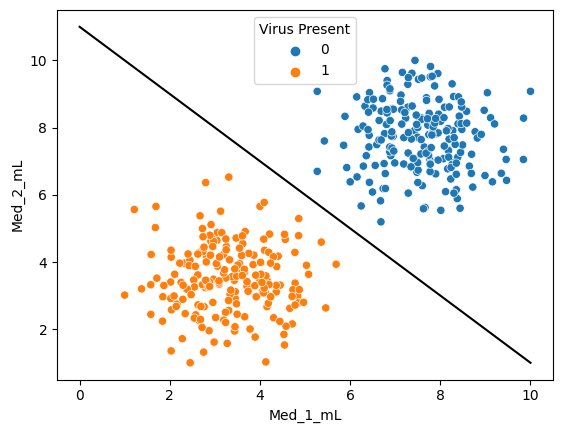

In [78]:
# Scatter Plot

sns.scatterplot(x = 'Med_1_mL', y = 'Med_2_mL', hue = 'Virus Present', data = df)

# Hyperplane (2D is Line)

x = np.linspace(0, 10, 100)
m = -1
b = 11

y = m * x + b

plt.plot(x, y, color = 'black')

In [79]:
# Support Vector Machines

from sklearn.svm import SVC
#help(SVC)

In [80]:
# Data Features and Class

X = df.drop('Virus Present', axis = 1)
y = df['Virus Present']

In [81]:
model = SVC(kernel = 'linear', C = 1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [82]:
# Import Request of Module

import requests
r = requests.get('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/CPE%20Electives%20(1%20-%203)/04.%20Live%20Lectures%20Notebook/54.%20Support%20Vector%20Machines/svm_margin_plot.py')

with open('svm_margin_plot.py', 'w') as f:

  f.write(r.text)


In [83]:
# Module Import

from svm_margin_plot import plot_svm_boundary

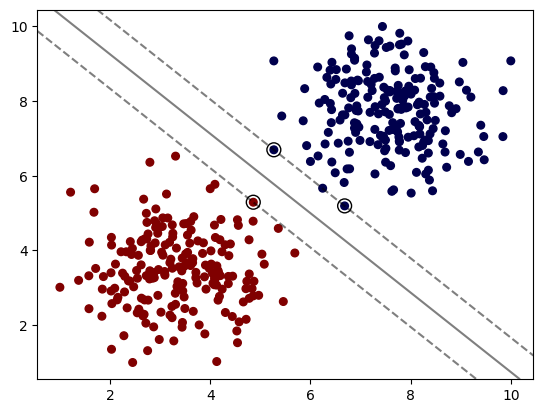

In [84]:
plot_svm_boundary(model, X, y)

## How setting hyperparameters affects the model?

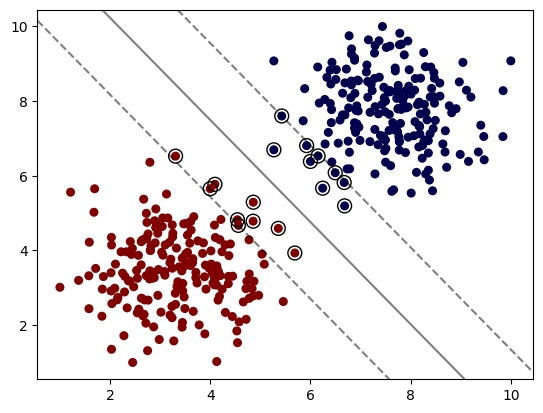

In [85]:
# When C gets closer to zero, you are allowing more points to be in the actual margins)

model = SVC(kernel = 'linear', C = 0.05)
model.fit(X, y)
plot_svm_boundary(model, X, y)

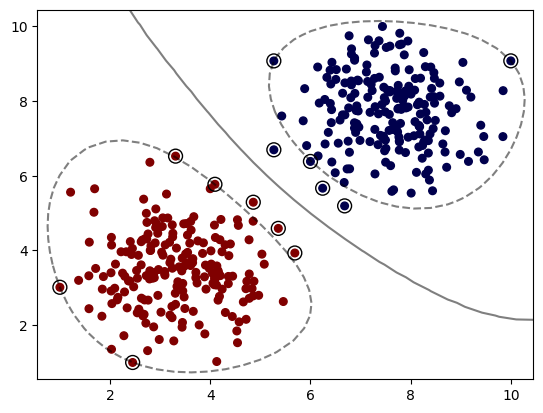

In [103]:
# How about rbf (radial basis function), this is the default of SVC
# It considers a larger feature space

model = SVC(kernel = 'rbf', C = 1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

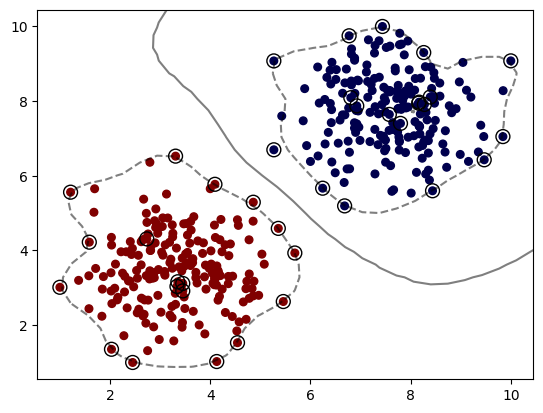

In [106]:
# How about the gamma parameter?
# How defines how much influence a single training example has
# As gamma gets larger, the closer other points has to be in order to be effective

model = SVC(kernel = 'rbf', C = 1, gamma = 'auto') # default is scale
model.fit(X, y)
plot_svm_boundary(model, X, y)

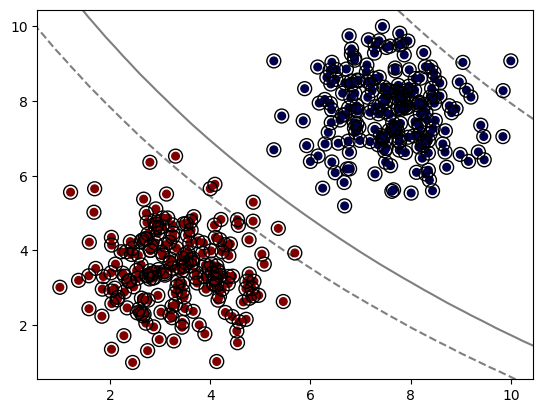

In [107]:
# How about sigmoid kernel?

model = SVC(kernel = 'sigmoid')
model.fit(X, y)
plot_svm_boundary(model, X, y)

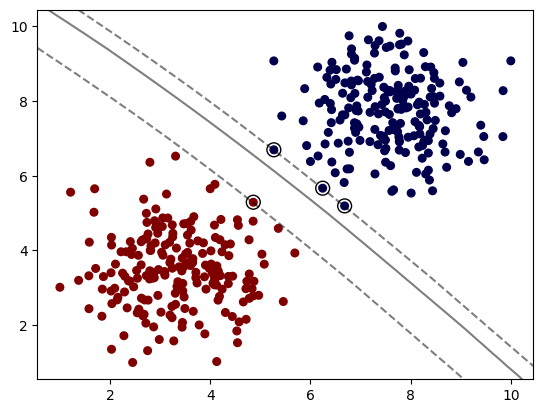

In [120]:
# How about polynomial kernel?

model = SVC(kernel = 'poly', C = 1, degree = 12)
model.fit(X, y)
plot_svm_boundary(model, X, y)

# Grid Search Method

In [122]:
# Import Grid Search

from sklearn.model_selection import GridSearchCV

In [127]:
svm = SVC()
param_grid = {'C': [0.01, 0.05, 0.1, 1], 'kernel': ['linear', 'rbf']}

In [128]:
grid = GridSearchCV(svm, param_grid)
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [129]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

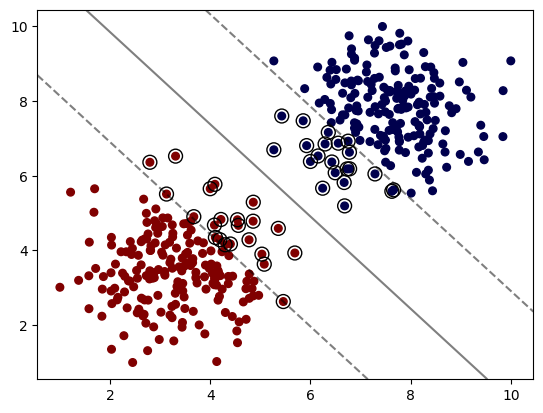

In [130]:
# This is the best hyperparameter for the Support Vector Machine (SVM)

model = SVC(kernel = 'linear', C = 0.01)
model.fit(X, y)
plot_svm_boundary(model, X, y)